In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import dill
from tqdm import tqdm
import sys
import os
import gc
import psutil  # Add this import to monitor memory usage

# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.append(os.path.dirname(current_dir))

In [2]:
from analyze.report import draw_rate_vs_angle_pop

/Users/francescodesantis/.pyenv/versions/hear_env/lib/python3.13/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


In [3]:
# List directory contents
result_dir = '/Users/francescodesantis/Library/CloudStorage/OneDrive-PolitecnicodiMilano/work/sound_localization/sl_results/'
items = os.listdir(result_dir)
for item in items:
    print(item) 

whitenoise_70dB&TanCarney&subject_3.pic
harmonic_69dB&TanCarney&subject_1.pic
whitenoise_70dB&TanCarney&subject_2.pic
tone_0.1kHz_70dB&TanCarney&itd_only_myoga_inv.pic
tone_1.5kHz_70dB&TanCarney&subject_1.pic
whitenoise_70dB&TanCarney&subject_1.pic
tone_1.kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic
whitenoise_70dB&TanCarney&subject_5.pic
vs_data_100_ANFs_4_tones.pkl
tone_10.kHz_70dB&TanCarney&ild_only.pic
tone_0.6kHz_70dB&TanCarney&subject_1.pic
whitenoise_70dB&TanCarney&subject_4.pic
vs_data_15_ANFs_15_tones.pkl
tone_10.kHz_70dB&TanCarney&itd_only.pic
tone_0.3kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&itd_only.pic
tone_0.5kHz_70dB&TanCarney&subject_1.pic
vs_data_8_ANFs_12_tones.pkl
tone_0.1kHz_70dB&TanCarney&ild_only.pic
tone_1.kHz_70dB&TanCarney&subject_1_myoga_inv.pic
tone_1.kHz_70dB&TanCarney&itd_only_myoga_null.pic
tone_1.3kHz_70dB&TanCarney&subject_1.pic
tone_0.8kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&subject_1.pic
tone_10.kHz_70dB&TanCarney&su

In [4]:
sounds = ['whitenoise'] #['tone_0.1kHz', 'tone_1.kHz', 'whitenoise']
cf_intervals = [None] #[[75,125], [900,1100], None] #[20,20000]

In [5]:
def get_memory_usage():
    """Return current memory usage in a human-readable format"""
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()
    return f"Memory usage: {memory_info.rss / (1024 * 1024):.2f} MB"

Starting processing for whitenoise
Memory usage: 218.34 MB
whitenoise 

Processing whitenoise_70dB&TanCarney&itd_only_myoga_inv.pic...
Memory usage: 218.98 MB
Error loading file /Users/francescodesantis/Library/CloudStorage/OneDrive-PolitecnicodiMilano/work/sound_localization/sl_results/whitenoise_70dB&TanCarney&itd_only_myoga_inv.pic: [Errno 60] Operation timed out
Processing whitenoise_70dB&TanCarney&itd_only.pic...
Memory usage: 22.62 MB
Control - Side L:
  Min rate: 25.71 Hz
  Max rate: 39.93 Hz
Processed and plotted Control
Memory usage: 633.42 MB
Processing whitenoise_70dB&TanCarney&itd_only_myoga_null.pic...
Memory usage: 633.42 MB
Null Delays - Side L:
  Min rate: 20.00 Hz
  Max rate: 36.14 Hz
Processed and plotted Null Delays
Memory usage: 625.58 MB


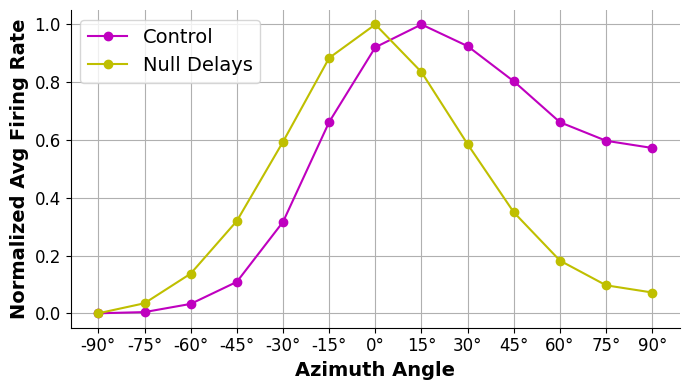

Completed processing for whitenoise
Memory usage: 629.66 MB
--------------------


In [6]:
for f, cf_interval in zip(sounds, cf_intervals):
    try:
        print(f"Starting processing for {f}")
        print(get_memory_usage())
        
        # Create a single figure and axis
        fig, ax = plt.subplots(figsize=(7, 4))
        print(f, '\n')

        file_infos = [
            {
                "path": result_dir + f"{f}_70dB&TanCarney&itd_only_myoga_inv.pic",
                "label": "Inverted Delays",
                "color": "b"
            },
            {
                "path": result_dir + f"{f}_70dB&TanCarney&itd_only.pic",
                "label": "Control",
                "color": "m"
            },
            {
                "path": result_dir + f"{f}_70dB&TanCarney&itd_only_myoga_null.pic",
                "label": "Null Delays",
                "color": "y"
            }
        ]

        # Track all original values (rates) for reporting
        all_original_values = {}
        
        # Process files one at a time
        for info in file_infos:
            try:
                print(f"Processing {info['path'].split('/')[-1]}...")
                print(get_memory_usage())
                
                # Check if file exists
                if not os.path.exists(info["path"]):
                    print(f"Warning: File {info['path']} does not exist. Skipping.")
                    continue
                
                # Load single file with better error handling
                try:
                    with open(info["path"], "rb") as file:
                        result = dill.load(file, ignore=True)
                except Exception as e:
                    print(f"Error loading file {info['path']}: {e}")
                    continue
        
                # Pass the axis to the function and specify the color and custom label
                ax, original_values = draw_rate_vs_angle_pop(
                    data=result,
                    color=info["color"],
                    pop='MSO',
                    cf_interval=cf_interval,
                    rate=True,
                    sides='L',
                    norm=True,
                    ax=ax,
                    title="",  # No title for individual plots
                    label=info["label"]  # Use the custom label
                )
                
                # Store original values for reporting
                if original_values:
                    all_original_values[info["label"]] = original_values
                    
                    # Print the min/max rate values
                    for side in original_values:
                        min_value = original_values[side]['min_value']
                        max_value = original_values[side]['max_value']
                        print(f"{info['label']} - Side {side}:")
                        print(f"  Min rate: {min_value:.2f} Hz")
                        print(f"  Max rate: {max_value:.2f} Hz")
                
                # Explicit memory cleanup
                del result
                gc.collect()
                print(f"Processed and plotted {info['label']}")
                print(get_memory_usage())
                
            except Exception as e:
                print(f"Error processing {info['label']}: {e}")
                continue
    
        # Finalize and save the plot
        ax.legend()
        plt.tight_layout()
        
        # Save the plot
        #plt.savefig(f"blockage_{f}.png", dpi=300)
        plt.show()
        # Explicit cleanup
        plt.close(fig)
        gc.collect()
        print(f"Completed processing for {f}")
        print(get_memory_usage())
        
    except Exception as e:
        print(f"Error during processing of {f}: {e}")
        # Make sure to clean up resources even if there's an error
        plt.close('all')
        gc.collect()
        
    # Additional cleanup between iterations
    plt.close('all')  # Close all figures to be safe
    gc.collect()
    print("--------------------")

In [2]:
import brian2hears

/Users/francescodesantis/.pyenv/versions/hear_env/lib/python3.13/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


In [4]:
brian2hears.sounds

<module 'brian2hears.sounds' from '/Users/francescodesantis/.pyenv/versions/hear_env/lib/python3.13/site-packages/brian2hears/sounds.py'>